## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-07-01 14:29:58.824638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 14:29:59.951647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loading data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

## Feature scaling the x_train

In [3]:
x_train = x_train / 255

## Creating a CNN model for the dataset

In [5]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, activation = 'relu', input_shape = (28, 28, 1), kernel_size = (2, 2)))
cnn.add(MaxPool2D(strides = (2, 2)))

cnn.add(Conv2D(filters = 32, activation = 'relu', kernel_size = (2, 2)))
cnn.add(MaxPool2D(strides = (2, 2)))

cnn.add(Conv2D(filters = 64, activation = 'relu', kernel_size = (2, 2)))
cnn.add(MaxPool2D(strides = (2, 2)))
cnn.add(Flatten())

cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'softmax'))

/home/naturalcapsule/python/machine_learning/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling and fitting the dataset

In [6]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8411 - loss: 0.5035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0527
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0326
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9918 - loss: 0.0280
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9923 - loss: 0.0236
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9947 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9949 - loss: 0.0158


## Visualizing the trained data on the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


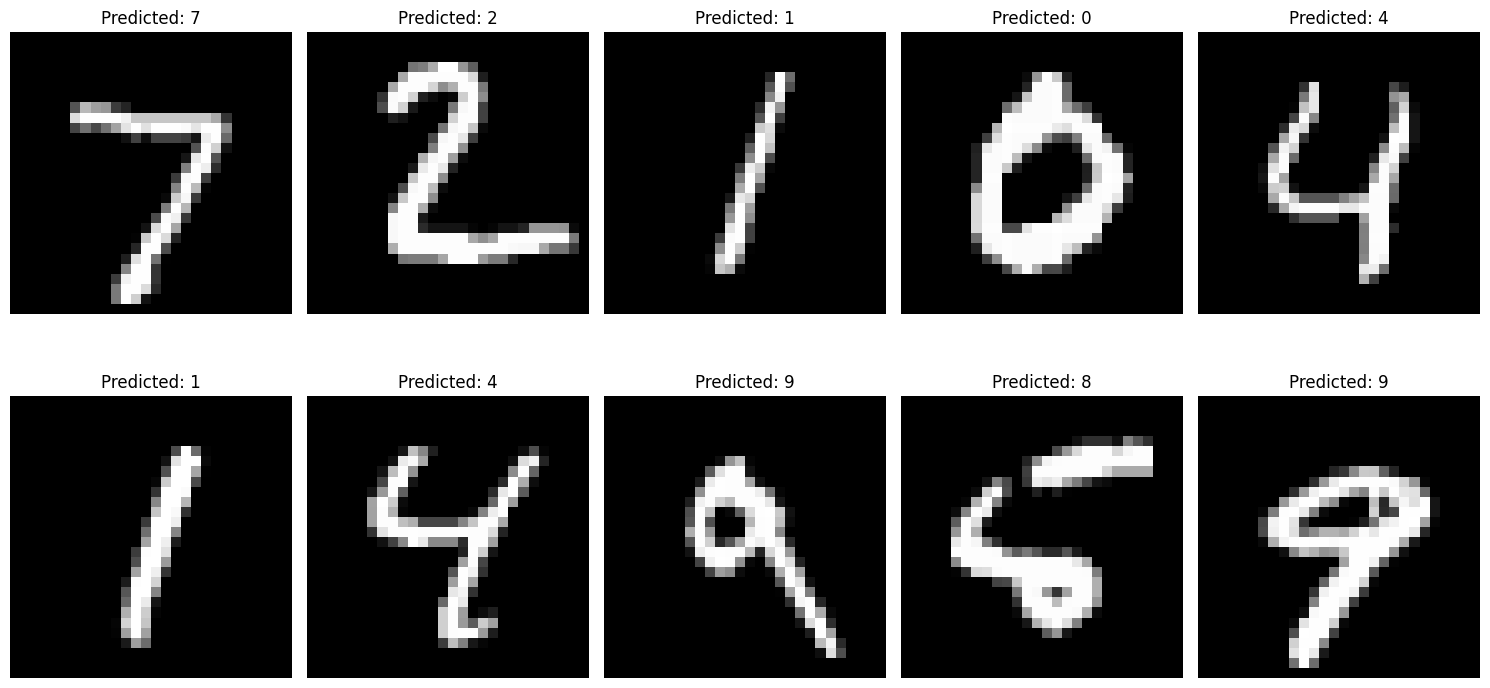

In [7]:
num_images = 10
predictions = cnn.predict(x_test[:num_images])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()